**Общая информация**

**Срок сдачи:** 18 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 октября, -4 балла после 06:00 25 октября, -6 баллов после 06:00 1 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from scipy import stats
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
%load_ext pycodestyle_magic

In [2]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase,
                             KNeighborsMixin,
                             SupervisedIntegerMixin,
                             ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.__algorithm = algorithm

    def fit(self, X, y):
        self.__data_tags = y.astype(int)
        self.__classes = np.unique(self.__data_tags)
        if self.__algorithm == 'brute':
            self.__data = X.astype(float)
            self.__data_sqr = np.sum(X.astype(float)**2, axis=1)
            self.__data_sqr = self.__data_sqr.reshape(-1, 1)
        elif self.__algorithm == 'kd_tree':
            self.__kd_tree = KDTree(X)

    def __get_neighbors(self, X):
        if self.__algorithm == 'brute':
            lX = X.astype(float)
            d = -2 * np.matmul(self.__data, lX.T)
            d += self.__data_sqr
            d += np.sum(lX**2, axis=1).reshape(1, -1)
            tags = d.argpartition(self.n_neighbors, axis=0).T
            return self.__data_tags[tags[:, :self.n_neighbors]]
        elif self.__algorithm == 'kd_tree':
            inds = self.__kd_tree.query(X, k=self.n_neighbors,
                                        return_distance=False)
            return self.__data_tags[inds]

    def predict(self, X):
        return stats.mode(self.__get_neighbors(X), axis=1)[0].reshape(1, -1)[0]

    def predict_proba(self, X):
        neig = self.__get_neighbors(X)
        ret = np.zeros([X.shape[0], self.__classes.shape[0]])
        for i, j in enumerate(neig):
            for a, b in enumerate(self.__classes):
                ret[i][a] = (j == b).sum() / self.n_neighbors
        return ret

    def score(self, X, y):
        prob = self.predict(X)
        return (prob == y).sum() / prob.shape[0]

**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [6]:
%time clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.53 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 100 µs


In [8]:
%time clf.predict(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.37 ms


array([0, 1, 0, 1, 2, 2, 0, 1, 1, 0, 2, 1, 1, 1, 0])

In [9]:
%time my_clf.predict(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.32 ms


array([0, 1, 0, 1, 2, 2, 0, 1, 1, 0, 2, 1, 1, 1, 0])

In [10]:
%time clf.predict_proba(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 513 µs


array([[1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0.5, 0.5],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ]])

In [11]:
%time my_clf.predict_proba(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 495 µs


array([[1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0.5, 0.5],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ]])

In [12]:
clf.score(X_test, y_test)

0.8666666666666667

In [13]:
my_clf.score(X_test, y_test)

0.8666666666666667

Задание 3

Best number of neighbors is  17


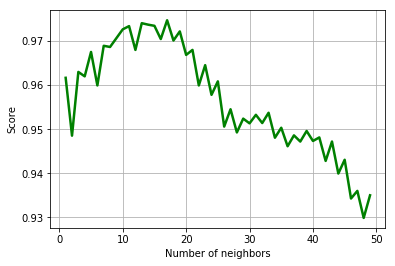

In [14]:
#%%pycodestyle
%matplotlib inline


max_n = 50
max_starts = 1000
scores = np.zeros((max_n-1), dtype=float)
my_clf = MyKNeighborsClassifier(n_neighbors=1)
for i in range(0, max_starts):
    X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                        iris.target,
                                                        test_size=0.1,
                                                        stratify=iris.target)
    my_clf.fit(X_train, y_train)
    for j in range(1, max_n):
        my_clf.n_neighbors = j
        scores[j-1] += my_clf.score(X_test, y_test)

plt.plot(np.arange(1, max_n), scores/max_starts, color='green', linewidth=2.5)
plt.grid()
plt.xlabel('Number of neighbors')
plt.ylabel('Score')

best_n = np.argmax(scores) + 1
print('Best number of neighbors is ', best_n)

**MNIST**

In [15]:
mnist = fetch_mldata('MNIST original')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [17]:
clf = KNeighborsClassifier(n_neighbors=best_n)
my_clf = MyKNeighborsClassifier(n_neighbors=best_n)

In [18]:
%time clf.fit(X_train, y_train)

CPU times: user 23.5 s, sys: 140 ms, total: 23.6 s
Wall time: 23.6 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')

In [19]:
%time my_clf.fit(X_train, y_train)

CPU times: user 376 ms, sys: 156 ms, total: 532 ms
Wall time: 308 ms


In [20]:
%time clf.predict(X_test)

CPU times: user 1min 1s, sys: 4 ms, total: 1min 1s
Wall time: 1min 1s


array([5., 9., 2., 4., 8., 1., 3., 1., 3., 5., 3., 3., 5., 1., 7., 0., 1.,
       8., 3., 4., 7., 8., 1., 8., 6., 2., 7., 0., 3., 0., 9., 1., 6., 0.,
       9., 1., 8., 7., 2., 8., 9., 5., 2., 0., 2., 4., 7., 0., 6., 5., 3.,
       1., 9., 8., 4., 2., 3., 1., 2., 4., 6., 6., 6., 5., 4., 4., 0., 6.,
       9., 1., 3., 0., 5., 5., 9., 2., 4., 7., 2., 9., 9., 9., 8., 7., 1.,
       8., 0., 7., 1., 4., 5., 9., 8., 1., 8., 1., 2., 3., 2., 0., 9., 0.,
       4., 7., 8., 4., 3., 7., 1., 6., 3., 4., 8., 2., 7., 8., 9., 9., 1.,
       7., 3., 9., 1., 4., 8., 0., 2., 7., 3., 7., 5., 9., 4., 7., 1., 4.,
       8., 9., 3., 3., 3., 4., 6., 6., 6., 9., 7., 1., 3., 0., 7., 9., 7.,
       4., 3., 6., 5., 5., 5., 1., 6., 0., 7., 7., 8., 1., 0., 8., 7., 1.,
       3., 9., 1., 8., 0., 9., 0., 0., 0., 9., 7., 5., 3., 6., 4., 6., 2.,
       0., 2., 0., 1., 2., 6., 3., 6., 1., 7., 6., 9., 9., 2., 2., 4., 0.,
       6., 4., 4., 1., 7., 8., 1., 4., 1., 5., 7., 6., 2., 3., 9., 9., 3.,
       1., 0., 7., 7., 4.

In [21]:
%time my_clf.predict(X_test)

CPU times: user 4.17 s, sys: 168 ms, total: 4.34 s
Wall time: 2.16 s


array([5, 9, 2, 4, 8, 1, 3, 1, 3, 5, 3, 3, 5, 1, 7, 0, 1, 8, 3, 4, 7, 8,
       1, 8, 6, 2, 7, 0, 3, 0, 9, 1, 6, 0, 9, 1, 8, 7, 2, 8, 9, 5, 2, 0,
       2, 4, 7, 0, 6, 5, 3, 1, 9, 8, 4, 2, 3, 1, 2, 4, 6, 6, 6, 5, 4, 4,
       0, 6, 9, 1, 3, 0, 5, 5, 9, 2, 4, 7, 2, 9, 9, 9, 8, 7, 1, 8, 0, 7,
       1, 4, 5, 9, 8, 1, 8, 1, 2, 3, 2, 0, 9, 0, 4, 7, 8, 4, 3, 7, 1, 6,
       3, 4, 8, 2, 7, 8, 9, 9, 1, 7, 3, 9, 1, 4, 8, 0, 2, 7, 3, 7, 5, 9,
       4, 7, 1, 4, 8, 9, 3, 3, 3, 4, 6, 6, 6, 9, 7, 1, 3, 0, 7, 9, 7, 4,
       3, 6, 5, 5, 5, 1, 6, 0, 7, 7, 8, 1, 0, 8, 7, 1, 3, 9, 1, 8, 0, 9,
       0, 0, 0, 9, 7, 5, 3, 6, 4, 6, 2, 0, 2, 0, 1, 2, 6, 3, 6, 1, 7, 6,
       9, 9, 2, 2, 4, 0, 6, 4, 4, 1, 7, 8, 1, 4, 1, 5, 7, 6, 2, 3, 9, 9,
       3, 1, 0, 7, 7, 4, 9, 1, 5, 9, 9, 9, 0, 7, 1, 4, 8, 6, 3, 7, 1, 0,
       2, 0, 1, 7, 6, 1, 7, 1, 7, 1, 8, 4, 8, 4, 7, 6, 1, 1, 4, 2, 4, 9,
       5, 5, 5, 9, 1, 7, 3, 9, 7, 8, 9, 9, 2, 4, 8, 4, 3, 3, 7, 5, 6, 2,
       7, 5, 1, 6, 2, 1, 9, 7, 7, 1, 3, 2, 2, 9, 3,

In [22]:
%time clf.predict_proba(X_test)

CPU times: user 1min 1s, sys: 8 ms, total: 1min 1s
Wall time: 1min 1s


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.05882353, 0.        , 0.94117647, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [23]:
%time my_clf.predict_proba(X_test)

CPU times: user 4.22 s, sys: 172 ms, total: 4.4 s
Wall time: 2.18 s


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.05882353, 0.        , 0.94117647, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [24]:
clf.score(X_test, y_test)

0.9671428571428572

In [25]:
my_clf.score(X_test, y_test)

0.9671428571428572

Задание 4

In [26]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [28]:
%time clf.fit(X_train, y_train)

CPU times: user 22.1 s, sys: 92 ms, total: 22.2 s
Wall time: 22.2 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [29]:
%time my_clf.fit(X_train, y_train)

CPU times: user 21 s, sys: 116 ms, total: 21.1 s
Wall time: 21 s


In [30]:
%time clf.predict(X_test)

CPU times: user 1min 6s, sys: 4 ms, total: 1min 6s
Wall time: 1min 6s


array([2., 4., 9., 3., 9., 5., 5., 6., 4., 2., 8., 6., 3., 6., 4., 5., 5.,
       0., 0., 6., 4., 3., 7., 9., 5., 6., 9., 0., 6., 7., 3., 2., 2., 1.,
       7., 3., 8., 8., 3., 1., 8., 1., 3., 8., 3., 6., 2., 8., 7., 8., 1.,
       7., 0., 0., 0., 5., 3., 3., 4., 0., 1., 0., 4., 4., 5., 2., 9., 3.,
       9., 6., 7., 0., 1., 4., 6., 2., 7., 4., 8., 0., 3., 3., 2., 1., 1.,
       1., 2., 5., 6., 0., 4., 6., 7., 1., 2., 0., 0., 5., 7., 2., 7., 3.,
       9., 5., 4., 0., 9., 1., 7., 0., 1., 5., 3., 7., 8., 0., 7., 1., 7.,
       8., 1., 0., 4., 1., 4., 2., 6., 8., 4., 2., 8., 6., 5., 7., 5., 8.,
       1., 0., 1., 7., 8., 0., 4., 7., 9., 8., 6., 5., 4., 1., 6., 4., 9.,
       8., 5., 9., 5., 7., 4., 6., 5., 5., 3., 2., 8., 8., 8., 0., 4., 3.,
       1., 5., 9., 9., 6., 3., 7., 9., 4., 0., 3., 6., 7., 6., 9., 3., 2.,
       9., 7., 2., 7., 5., 4., 5., 9., 9., 1., 0., 1., 3., 3., 7., 5., 2.,
       3., 6., 9., 5., 7., 9., 5., 2., 9., 4., 9., 5., 7., 9., 4., 7., 8.,
       0., 7., 1., 1., 7.

In [31]:
%time my_clf.predict(X_test)

CPU times: user 54.6 s, sys: 4 ms, total: 54.6 s
Wall time: 54.6 s


array([2, 4, 9, 3, 9, 5, 5, 6, 4, 2, 8, 6, 3, 6, 4, 5, 5, 0, 0, 6, 4, 3,
       7, 9, 5, 6, 9, 0, 6, 7, 3, 2, 2, 1, 7, 3, 8, 8, 3, 1, 8, 1, 3, 8,
       3, 6, 2, 8, 7, 8, 1, 7, 0, 0, 0, 5, 3, 3, 4, 0, 1, 0, 4, 4, 5, 2,
       9, 3, 9, 6, 7, 0, 1, 4, 6, 2, 7, 4, 8, 0, 3, 3, 2, 1, 1, 1, 2, 5,
       6, 0, 4, 6, 7, 1, 2, 0, 0, 5, 7, 2, 7, 3, 9, 5, 4, 0, 9, 1, 7, 0,
       1, 5, 3, 7, 8, 0, 7, 1, 7, 8, 1, 0, 4, 1, 4, 2, 6, 8, 4, 2, 8, 6,
       5, 7, 5, 8, 1, 0, 1, 7, 8, 0, 4, 7, 9, 8, 6, 5, 4, 1, 6, 4, 9, 8,
       5, 9, 5, 7, 4, 6, 5, 5, 3, 2, 8, 8, 8, 0, 4, 3, 1, 5, 9, 9, 6, 3,
       7, 9, 4, 0, 3, 6, 7, 6, 9, 3, 2, 9, 7, 2, 7, 5, 4, 5, 9, 9, 1, 0,
       1, 3, 3, 7, 5, 2, 3, 6, 9, 5, 7, 9, 5, 2, 9, 4, 9, 5, 7, 9, 4, 7,
       8, 0, 7, 1, 1, 7, 0, 9, 6, 8, 0, 8, 0, 7, 4, 2, 6, 9, 2, 6, 5, 7,
       5, 3, 1, 2, 7, 4, 3, 0, 9, 7, 3, 7, 8, 2, 5, 2, 5, 3, 7, 0, 8, 9,
       3, 5, 5, 7, 1, 7, 4, 5, 5, 0, 3, 5, 4, 9, 3, 5, 6, 1, 1, 4, 8, 0,
       6, 3, 9, 9, 5, 8, 3, 4, 3, 1, 3, 1, 4, 8, 3,

In [32]:
%time clf.predict_proba(X_test)

CPU times: user 1min 4s, sys: 20 ms, total: 1min 4s
Wall time: 1min 4s


array([[0. , 0. , 1. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0.5],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [33]:
%time my_clf.predict_proba(X_test)

CPU times: user 54.7 s, sys: 0 ns, total: 54.7 s
Wall time: 54.7 s


array([[0. , 0. , 1. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0.5],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [34]:
clf.score(X_test, y_test)

0.97

In [35]:
my_clf.score(X_test, y_test)

0.97

Задание 5

In [38]:
# seaborn
"""
Библиотека для визуализации данных, основанная на matplotlib
Упрощает процесс построения графиков
"""

# matplotlib
"""
Библиотека для построения графиков различного типа
Преимущественно используется для визуализаии данных
"""

# train_test_split
"""
Функция, разбивающая набор данных и их метки на две части - тренировочную и тестовую
"""

# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)
"""
Конвеер - позволяет применить к данным последовательность преобразований
с последующей оценкой результата обучения модели
"""

# StandardScaler (from sklearn.preprocessing import StandardScaler)
"""
Производит стандартизацию данных. То есть преобразует их таким образом, что mean = 0,
а стандартное отклонение = 1
"""

# ClassifierMixin
"""
Базовый класс для всех классификаторов sklearn
"""

# NeighborsBase
"""
Базовый класс для классов, реализующих knn в sklearn
"""

# KNeighborsMixin
"""
Базовый класс, реализующий поиск ближайших соседей в sklearn
"""

# SupervisedIntegerMixin
"""
Базовый класс, в котором реализована функция обучения (fit)
"""


'\nБазовый класс, в котором реализована функция обучения (fit)\n'